# Support Vector Machines
Die Support Vector Machines sind eine Sammlung von Algorithmen, welche im Gegensatz zum K-Nearest sogenannte Hilfspunkte (Supportvektoren) für die Vorhersagen verwendet.

Gerade in höher Dimensionalen Modellen (mit vielen Features) haben sich Support Vector Algorithmen als Robuster und Speicherschonender erwiesen, als die anderen Algorithmen.

In diesem Kapitel schauen wir uns je ein Beispiel für Support Vector Klassifikation (SVC) und Support Vector Regression (SVR) an.

## Support Vector Classification (SVC)
Wir werden bei diesem Beispiel wieder mit dem Iris-Dataset arbeiten, welches anhald der Blütenlänge und -breite eine Vorhersage macht, welche Pflanzenart gemeint ist.

Zuerst importieren wir unsere Libraries

In [ ]:
# Matplotlib importieren
import matplotlib.pyplot as plt
# Support Vector Machines Library importieren - datasets wird für Iris verwendet
from sklearn import svm, datasets
# Numpy importieren
import numpy as np

Anschliessend erstellen wir ein Meshgrid (du musst im Moment nicht im Detail wissen, was die Funktion macht).

## Hilfsfunktionen

In [ ]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

Nun benötigen wir noch eine Plot-Funktion, welche die Vorhersage grafisch ausgibt.

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Anschliessend laden wir das Iris-Datenset in den Speicher.

## Daten modellieren

In [ ]:
# Iris Datenset laden
iris = datasets.load_iris()
# Wir verwenden nur die ersten zwei Features (Sepal Height & Sepal Width).
X = iris.data[:, :2]
y = iris.target

Nun erstellen wir ein SVM-Modell (Erklärungen zu den einzelnen Optionen folgen nachher.

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

In [ ]:
# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

Anschliessend plotten wir die Grafiken.

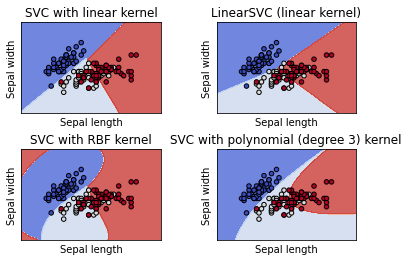

In [ ]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Support Vector Regression


Wir importieren unsere Libraries

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

Anschliessend erzeugen wir zufällige Daten (Basis ist eine Sinus-Funktion)

In [ ]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

Nun fügen wir ein wenig Streuung in die Daten ein (Noise)

In [ ]:
y[::5] += 3 * (0.5 - np.random.rand(8))

Anschliessend trainieren wir unsere Modelle

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

Und nun geben wir die resultate aus. Anhand dieser sehen wir, wie welches Modell performt.

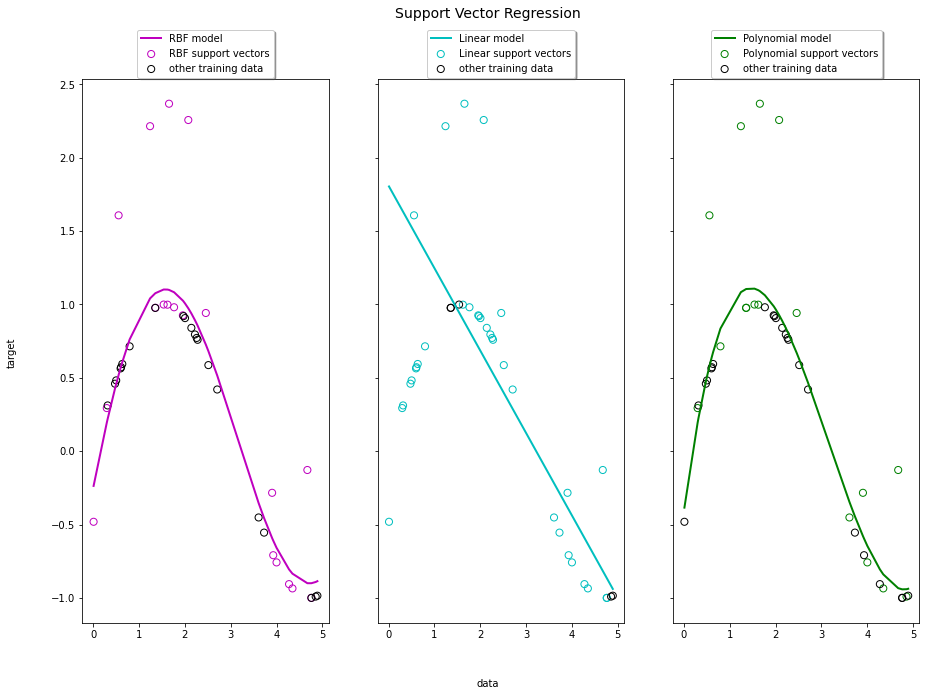

In [ ]:
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()